In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import preprocess 
import time
import os
import sys 
from color_isolation import colorIsolationTestImages
from white_line import draw_centerline,mask_canny

# 1) HSV

#### a) RED

In [ ]:
#img = cv2.imread('road_following_testautomaticOK/apex/103_125_b5806fdc-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
img = cv2.imread('road_following_r_line/apex/103_74_05d6c3b2-87d9-11eb-9cc4-a0a4c55ef385.jpg',1)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

lower1 = np.array([90, 100,100])
upper1 = np.array([130, 255, 255])

lower2 = np.array([90,100,0])
upper2 = np.array([130,255,100])

mask1 = cv2.inRange(hsv, lower1, upper1)
mask2 =cv2.inRange(hsv, lower2, upper2)
mask_first=mask1+mask2
mask_first[0:50,0:224]=0
percentage1=np.sum(mask_first==0)/(224*224)
print("1",percentage1)

if percentage1>0.95 or percentage1<0.89:
    lower1 = np.array([170, 100,0])
    upper1 = np.array([180, 255, 100])
        
    lower2 = np.array([0,100,0])
    upper2 = np.array([5,255,100])
    mask1 = cv2.inRange(hsv, lower1, upper1)
    mask2 =cv2.inRange(hsv, lower2, upper2)
    mask_second=mask1+mask2
    mask_second[0:90,0:224]=0
    percentage2= np.sum(mask_second==0)/(224*224)
    print("2",percentage2)

    if (percentage2>0.95 or percentage2<0.89) & (percentage1 < percentage2) :
        mask=mask_first
        print("keep mask 1")
    else:
        mask=mask_second
        print("keep mask 2")
else : 
    mask = mask_first

plt.imshow(mask_first)
plt.show()
plt.imshow(mask)
plt.show()


#### b) Orange

(224, 224)


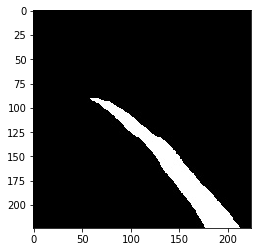

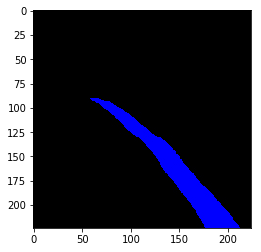

1 1.0
2 1.0
else
1.0


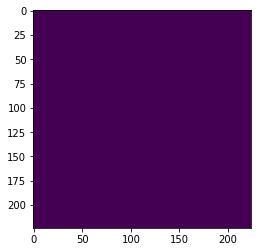

In [17]:
#img = cv2.imread('road_following_testautomaticOK/apex/103_125_b5806fdc-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

lower = np.array([0, 50,100])
upper = np.array([60,255, 255])
mask_first = cv2.inRange(hsv, lower, upper)
mask_first[0:90,0:224]=0
percentage1= np.sum(mask_first==0)/(224*224)
print("1",percentage1)

if percentage1>0.95 or percentage1<0.89:
    lower = np.array([0, 50,0])
    upper = np.array([60,255, 120])
    mask_second = cv2.inRange(hsv, lower, upper)
    mask_second[0:90,0:224]=0
    percentage2= np.sum(mask_second==0)/(224*224)
    print("2",percentage2)

    if (percentage2>0.95 or percentage2<0.89) and percentage1 < percentage2 :
        mask=mask_first
        print("keep mask 1")
        
    else:
        mask=mask_second
        print("else")
        
else: 
    mask = mask_first


plt.imshow(mask)
print(np.sum(mask==0)/(224*224))
plt.show()

#### c) Orange but with BGR 

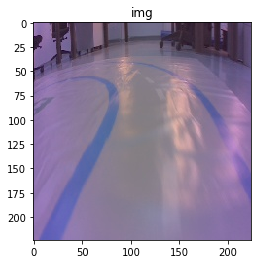

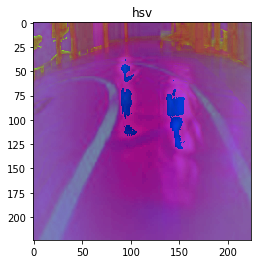

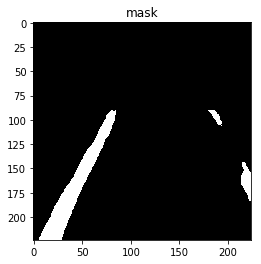

142


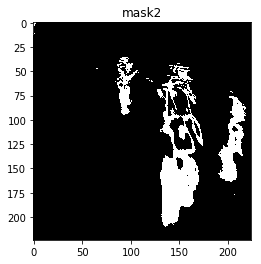

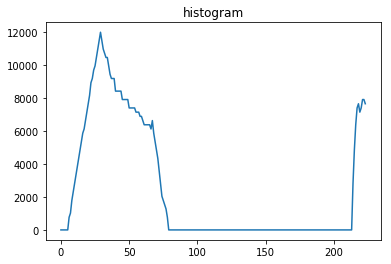

149
149.4109234234234


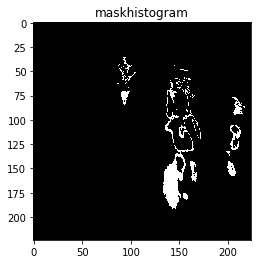

0.9499960140306123
time= 2.24373197555542


In [2]:
#Preprocess 
#img = cv2.imread('road_following_CircuitRgbOK/apex/103_125_b5806fdc-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
img = cv2.imread('road_following_CircuitRgbOK/apex/105_125_b77ac756-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
#img = cv2.imread('road_following_orange_line/apex/170_149_81570b96-b826-11eb-afe4-a0a4c55ef385.jpg',1)
#img = cv2.imread('road_following_r_line/apex/161_77_982d24dc-87d8-11eb-9cc4-a0a4c55ef385.jpg',1)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

#orange line isolation
mask= cv2.inRange(hsv, (90, 95,0), (130,255, 255))
mask[0:90,0:224]=0


#Show
plt.imshow(img)
plt.title('img')
plt.show()

plt.imshow(hsv)
plt.title('hsv')
plt.show()

plt.imshow(mask,cmap='gray')
plt.title('mask')
plt.show()


#### d) White (Test i.e White_drawLine.ipynb for more tests)

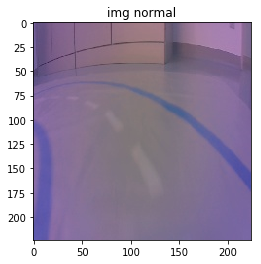

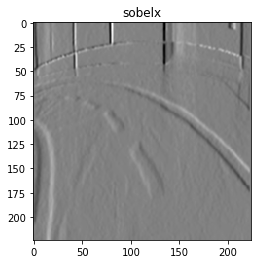

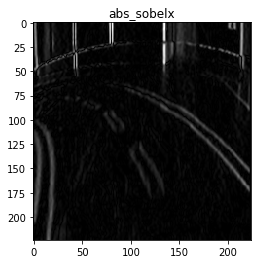

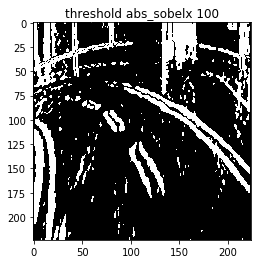

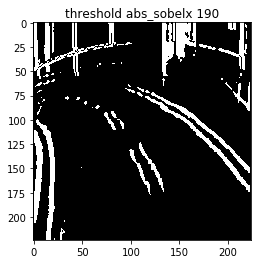

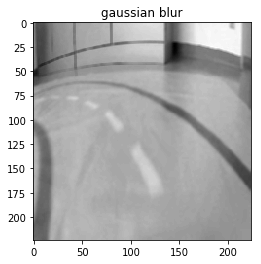

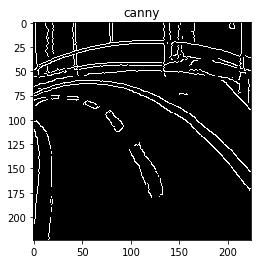

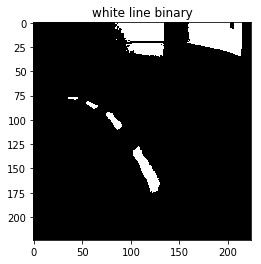

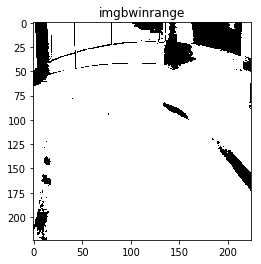

0.9878228635204082
time= 3.2467336654663086


In [6]:
img = cv2.imread('road_following_CircuitRgbOK/apex/103_125_b5806fdc-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
#img = cv2.imread('road_following_orange_line/apex/170_149_81570b96-b826-11eb-afe4-a0a4c55ef385.jpg',1)
#img = cv2.imread('road_following_r_line/apex/161_77_982d24dc-87d8-11eb-9cc4-a0a4c55ef385.jpg',1)
plt.imshow(img)
plt.title('img normal')
plt.show()

t0=time.time()
imgbw = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

sobelx = cv2.Sobel(imgbw,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobelx,cmap='gray')
plt.title('sobelx')
plt.show()

abs_sobelx=np.absolute(sobelx)

plt.imshow(abs_sobelx,cmap='gray')
plt.title('abs_sobelx')
plt.show()

ret,thresh_bin3=cv2.threshold(abs_sobelx,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh_bin3,cmap='gray')
plt.title('threshold abs_sobelx 100')
plt.show()

ret,thresh_bin2=cv2.threshold(abs_sobelx,190,255,cv2.THRESH_BINARY)
plt.imshow(thresh_bin2,cmap='gray')
plt.title('threshold abs_sobelx 190')
plt.show()

edges=cv2.GaussianBlur(imgbw,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(edges,cmap='gray')
plt.title('gaussian blur')
plt.show()

edges = cv2.Canny(edges,10,20)
plt.imshow(edges,cmap='gray')
plt.title('canny')
plt.show()

#contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#imgcontour=cv2.drawContours(imgbw, contours, -1, (0,255,75), 2)
#plt.imshow(imgcontour,cmap='gray')
#plt.title('contour')
#plt.show()

ret,thresh_bin=cv2.threshold(imgbw,129,255,cv2.THRESH_BINARY)
plt.imshow(thresh_bin,cmap='gray')
plt.title('white line binary')
plt.show()


imgbwinrange=cv2.inRange(imgbw,100,135)
plt.imshow(imgbwinrange,cmap='gray')
plt.title('imgbwinrange')
plt.show()


thresh_bin[0:90,0:224]=0
print(np.sum(thresh_bin==0)/(224*224))




t1=time.time()
print("time=",t1-t0)


# 3) FUNCTIONS TRY ON MULTIPLE SAMPLE

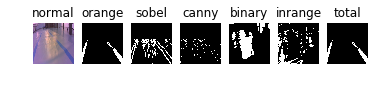

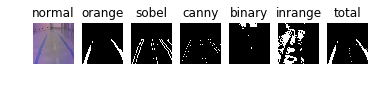

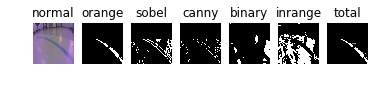

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


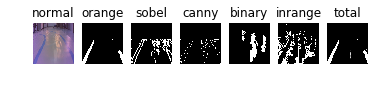

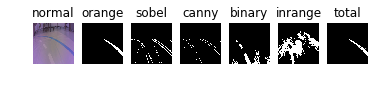

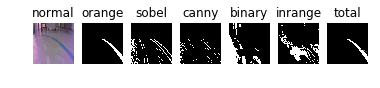

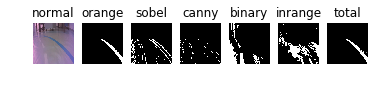

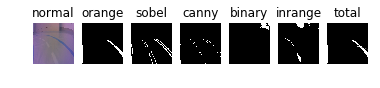

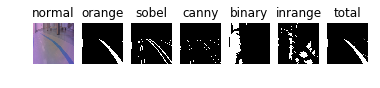

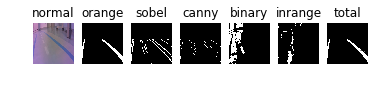

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import preprocess 
import time
import os
from color_isolation import colorIsolationTestImages

randomnb=np.random.randint(750, size=10)
liste_cate = os.listdir('road_following_CircuitRgbOK/apex/')

for i in randomnb:
    colorIsolationTestImages('road_following_CircuitRgbOK/apex/'+str(liste_cate[i]))
    

# 4) LIVE PREVIEW COLOR ISOLATION

In [ ]:
from jetcam.csi_camera import CSICamera
# from jetcam.usb_camera import USBCamera
camera = CSICamera(width=224, height=224)
# camera = USBCamera(width=224, height=224)
camera.running = True

In [ ]:
import ipywidgets
from IPython.display import display
import traitlets
from jetcam.utils import bgr8_to_jpeg
from color_isolation import colorIsolationPreprocess
from utils import preprocess
from matplotlib import pyplot as plt
import PIL.Image
import torchvision


image_widget= ipywidgets.Image(format='jpeg', width=camera.width, height=camera.height)
colorIsolation_widget = ipywidgets.Image(format='jpeg', width=camera.width, height=camera.height)
#preprocess_widget = ipywidgets.Image(format='jpeg', width=camera.width, height=camera.height)
image=camera.value.copy()
image_colorIsolation=colorIsolationPreprocess(image,'red')
imagePreprocess=preprocess(image)
colorIsolation_widget.value=bgr8_to_jpeg(image_colorIsolation)
image_widget.value=bgr8_to_jpeg(image)


display(image_widget,colorIsolation_widget)


# 5) APPLY PROCESS TO FOLDER 

In [2]:
data_dir='road_following_CircuitRgbOK'
dir_target='road_following_CiruitBwCannyOK'
import cv2
import numpy as np
import os 
import uuid
from color_isolation import colorIsolationTransform

os.chdir("/home/jetson/jetracer/notebooks")
num=1000


if not os.path.exists(dir_target) :
    os.mkdir(dir_target)
    os.mkdir(dir_target+"/apex")
    while not os.path.exists(dir_target):
        pass
    print(dir_target," create")
else :
    print(dir_target," already exists")
    
liste_cate = os.listdir(data_dir+'/apex')
    

for a in range(0,len(liste_cate)): 
    path=data_dir+'/apex/'+liste_cate[a]
    items=[]
    if path.endswith(".jpg"):
        items = liste_cate[a].split('_')
        img=mask_canny(path)
        cv2.imwrite(dir_target+'/apex/'+str(items[0])+'_'+str(items[1])+'_'+str(uuid.uuid1())+'.jpg', img)

print("image processed and copy in ", dir_target+"/apex")

    
    


road_following_CiruitBwCannyOK  create
image processed and copy in  road_following_CiruitBwCannyOK/apex


In [ ]:
# Import the os module
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
#os.chdir('road_following_test_TRAIN')


#### 5) bis Filter black image

In [ ]:
nbpixelsnoir=0
totpixel=224*224
imgnb = cv2.imread('road_following_colorIsolation/apex/41_162_ColorIsolation202.jpg',-1)
nbpixelnoir=np.sum(imgnb==0)
percentage=nbpixelnoir/totpixel
print("%black pixels:",percentage)


In [ ]:
import os 
import cv2
import numpy as np
data_dir='road_following_colorIsolation'
nbrm=0

liste_cate = os.listdir(data_dir+'/apex')
listerem=[]
listeper=[]


for a in range(0,len(liste_cate)): 
    path=data_dir+'/apex/'+liste_cate[a]
    if path.endswith(".jpg"):
        nbpixelnoir=0
        imgnb = cv2.imread(path,-1)
        percentage=np.sum(imgnb==0)/(224*224)
        if percentage > 0.9:
            #os.remove(path)
            print(percentage)
            listeper.append(percentage)
            print(path," removed")
            listerem.append(path)
            nbrm+=1
        #elif 0.95>percentage>0.93:
            #print(path)

print(nbrm)